# 主成分分析

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

主成分方法是一个常用的无监督方法，可以用于快速灵活地进行数据降维

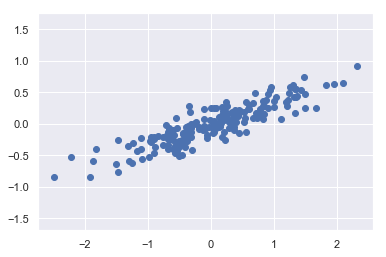

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
# rand以均匀分布产生给定形状且介于（0,1）的随机数
# randn以标准正态分布产生给定形状的随机数
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [7]:
X.shape

(200, 2)

In [8]:
pca.explained_variance_

array([0.7625315, 0.0184779])

## 主成分分析中最重要的两个指标：

**成分**和**可解释差异**

可以构成数据的**主轴**，成分中存储着向量（主轴）的方向，可解释差异中存储了平方长度（二范数长度）

In [15]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                     linewidth=2, shrinkA=0, shrinkB=0, color='red')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

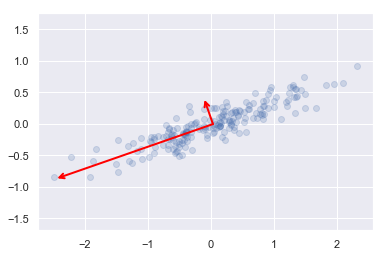

In [16]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

## 数据的主成分

即各数据点在主轴上的**投影**

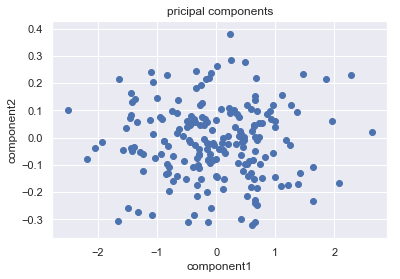

In [23]:
Y = np.dot(X, pca.components_)
plt.xlabel('component1')
plt.ylabel('component2')
plt.title('pricipal components')
plt.scatter(Y[:, 0], Y[:,1])

# PCA降维

In [27]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:", X.shape)
print("transformed shape:", X_pca.shape)

original shape: (200, 2)
transformed shape: (200, 1)


(-2.77152878069022, 2.661757596590676, -0.9964674432667124, 1.0219081775900811)

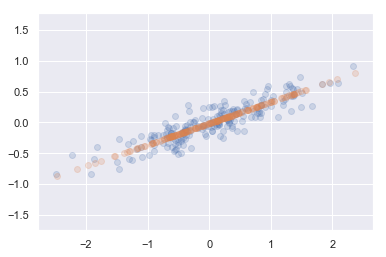

In [30]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:,1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.2)
plt.axis('equal')

对之前的数据进行降维到一个维度，发现是按平方长度最大的轴进行降维，舍去了另外一个轴的信息，即降维中的**信息损失**

# PCA做噪音处理

In [40]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 cmap='binary', interpolation='nearest', clim=(0, 16))

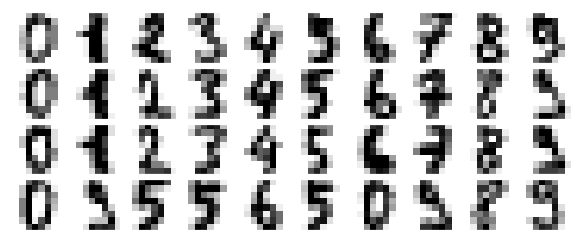

In [41]:
from sklearn.datasets import load_digits
digits = load_digits()
plot_digits(digits.data)

进行噪声处理

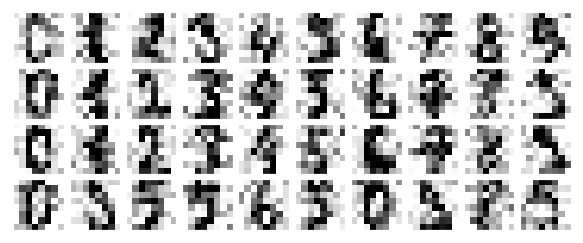

In [42]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
# 正态随机数生成，对于每个原始数据，对应的随机数均值为原始数据，方差为4
plot_digits(noisy)

In [43]:
pca = PCA(0.50).fit(noisy)
# 保留百分之50的方差，得出对应12个主成分
pca.n_components_

12

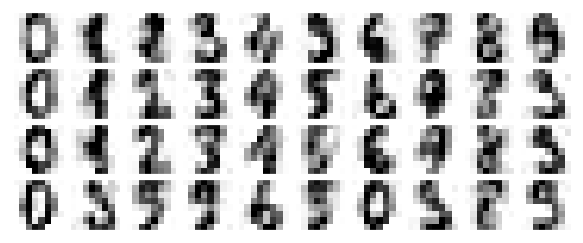

In [45]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# 特征脸

In [46]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [47]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

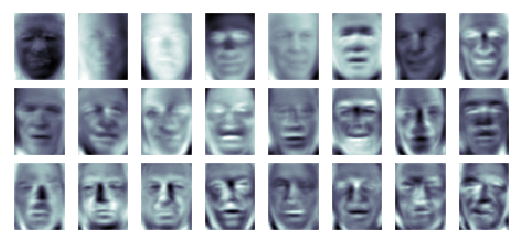

In [48]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

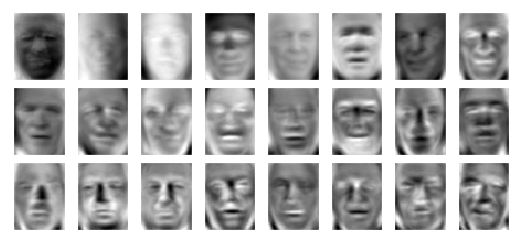

In [53]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='binary_r')

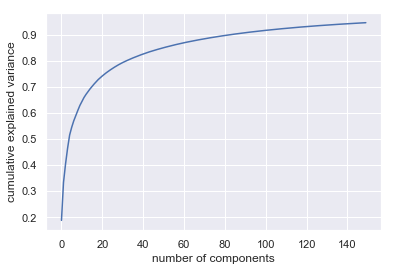

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [50]:
# 计算成分和投影的人脸
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstruction')

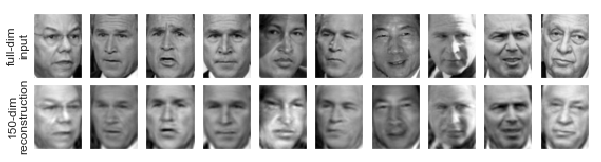

In [52]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')